# This projects will used cleaned version of data and create the models and compare them

# First load training data and do some cleanup as necessary

In [13]:
# Before any thing else lets load some basic python libraries.
import pandas as pd
import scipy
import IPython
import numpy as np
from matplotlib import style
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

In [14]:
#For visualizing bigger dataFrames
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [15]:
#Ignoring Warnings 
import warnings
warnings.filterwarnings("ignore")

# Step 1: Load Clean data 

In [31]:
#now read the training data 
df=pd.read_csv('clean_data_for_classification.csv')
print(df.shape)
df.head()

(40000, 65)


,y,x1,x4,x5,x6,x8,x9,x10,x12,x13,x15,x17,x18,x20,x21,x22,x23,x25,x26,x27,x29,x32,x35,x38,x40,x43,x46,x50,x51,x58,x61,x62,x63,x66,x67,x70,x71,x72,x73,x75,x79,x80,x81,x82,x83,x84,x87,x88,x90,x91,x92,x94,x96,x97,x100,x3,x7,x19,x24,x31,x33,x60,x65,x77,x93
0,0,-1.421286,0.734820,-1.047197,-1.171538,0.149538,-0.460571,0.661698,0.448960,0.348319,-0.404365,-1.641760,-0.341878,0.667396,1.633700,2.080455,1.040955,-0.469096,1.517841,-0.899935,-0.181543,-0.607120,1.061521,0.005939,0.975115,0.698954,0.118036,-0.525209,0.798252,0.005941,-0.050981,1.242691,0.842283,0.820130,-1.348136,-0.522617,-2.142134,0.548119,0.142184,0.361431,0.345388,0.434538,-0.318273,1.239394,-1.491237,-2.249051,-0.132662,0.589261,-0.196945,-0.278604,-1.057843,1.043786,0.012738,-1.195336,0.805457,1.133789,0.618845,-0.902449,-0.903895,-0.419178,-0.685146,0.481545,-1.306842,-0.867980,-0.355767
1,1,-0.280019,1.011947,0.713660,-0.564701,0.820941,0.402488,0.902618,-0.441743,-0.910042,-0.795207,0.212029,-1.401285,0.517390,-0.462655,0.801586,0.140524,-0.259914,1.065887,-1.252224,0.306955,0.303830,-1.424994,-0.178006,-1.103087,-1.283206,0.608451,1.321334,0.327129,0.005941,-0.905175,0.019376,0.042198,0.499483,-0.012063,0.767260,-0.002887,-0.484269,0.059334,-0.329280,-0.003861,0.663906,1.079035,0.571618,0.344975,0.000352,1.065635,0.725104,0.603615,0.453072,1.740928,-0.423755,-1.395653,0.252884,0.229807,-0.300273,0.638916,-1.857519,1.106324,-0.419178,-0.647791,-2.015525,0.890761,-0.867980,-0.355767
2,1,0.715641,0.097596,0.281462,0.517269,0.655022,-0.986047,-1.687003,-0.542804,-0.995126,0.135474,0.262270,-0.616185,-0.327420,-0.231455,-0.042675,-0.129291,-0.264984,-0.241502,0.748328,2.231444,1.084443,-0.756277,-0.196808,-0.183258,-0.342304,-1.457949,1.750278,0.186022,-3.372477,-1.114568,-1.095656,-0.157157,-0.022945,-0.012063,0.751190,-0.002887,-0.268630,0.430472,-0.130300,0.345388,-1.715595,-1.699016,-0.127411,-0.524798,0.000352,0.561875,-0.759884,0.856252,1.426923,-1.264505,0.335390,-0.982505,-1.103110,1.776191,-1.508507,-0.083635,-0.537461,1.106324,-0.419178,-0.283113,-1.909984,-1.340272,-0.789583,-0.355767
3,0,0.463922,1.204139,-0.200051,-0.614409,-0.362856,-0.455942,1.682477,-1.238867,0.030295,-1.390406,-0.614101,-0.762927,0.780526,-0.184930,1.897393,0.488294,0.947804,-0.388695,0.502848,0.943031,0.274159,-0.034510,0.485996,-0.547467,-1.422154,-1.211025,-0.146143,1.060916,0.005941,-1.180219,-1.702673,0.216608,-0.316528,-0.012063,-0.083202,-3.545463,-0.010591,-0.226566,0.130579,0.345388,-1.003632,0.906481,0.290566,-0.213765,0.000352,1.755399,1.231060,-0.057076,0.621568,0.673371,0.091575,-0.922773,-0.414950,0.571178,1.019314,-0.575371,-0.177368,1.106324,-0.419178,-0.666235,-1.909984,-1.340272,-1.140031,-0.355767
4,0,-0.065760,2.326799,0.061024,1.011583,-0.509334,-0.289985,-0.743549,1.172094,-0.001678,-0.819324,0.483306,-0.300820,-0.759031,0.857465,-0.599905,-1.279547,0.546115,0.277583,-0.473684,-0.351861,0.914705,-0.807369,-0.166424,0.691748,0.490833,1.946034,0.259048,1.122845,-4.305046,-0.694523,-1.124598,0.283545,-0.133174,-0.012063,0.985029,-0.002887,0.214566,0.445917,0.199254,0.345388,-1.373755,0.441807,0.188774,-0.169596,0.000352,0.566806,-1.323734,-0.066871,2.082176,-1.011122,-0.500614,-0.165339,0.855504,-1.352811,-1.535564,1.090510,0.970773,1.106324,2.385624,-0.408719,0.486929,-1.340272,-1.001099,2.810828


**Lets Separate the Predicted data columns from the cleam data.**

In [35]:
df.iloc[:,:-1]
df_X=df.iloc[:, 1 :]
print(df_X.shape)
df_X.head()

(40000, 64)


,x1,x4,x5,x6,x8,x9,x10,x12,x13,x15,x17,x18,x20,x21,x22,x23,x25,x26,x27,x29,x32,x35,x38,x40,x43,x46,x50,x51,x58,x61,x62,x63,x66,x67,x70,x71,x72,x73,x75,x79,x80,x81,x82,x83,x84,x87,x88,x90,x91,x92,x94,x96,x97,x100,x3,x7,x19,x24,x31,x33,x60,x65,x77,x93
0,-1.421286,0.734820,-1.047197,-1.171538,0.149538,-0.460571,0.661698,0.448960,0.348319,-0.404365,-1.641760,-0.341878,0.667396,1.633700,2.080455,1.040955,-0.469096,1.517841,-0.899935,-0.181543,-0.607120,1.061521,0.005939,0.975115,0.698954,0.118036,-0.525209,0.798252,0.005941,-0.050981,1.242691,0.842283,0.820130,-1.348136,-0.522617,-2.142134,0.548119,0.142184,0.361431,0.345388,0.434538,-0.318273,1.239394,-1.491237,-2.249051,-0.132662,0.589261,-0.196945,-0.278604,-1.057843,1.043786,0.012738,-1.195336,0.805457,1.133789,0.618845,-0.902449,-0.903895,-0.419178,-0.685146,0.481545,-1.306842,-0.867980,-0.355767
1,-0.280019,1.011947,0.713660,-0.564701,0.820941,0.402488,0.902618,-0.441743,-0.910042,-0.795207,0.212029,-1.401285,0.517390,-0.462655,0.801586,0.140524,-0.259914,1.065887,-1.252224,0.306955,0.303830,-1.424994,-0.178006,-1.103087,-1.283206,0.608451,1.321334,0.327129,0.005941,-0.905175,0.019376,0.042198,0.499483,-0.012063,0.767260,-0.002887,-0.484269,0.059334,-0.329280,-0.003861,0.663906,1.079035,0.571618,0.344975,0.000352,1.065635,0.725104,0.603615,0.453072,1.740928,-0.423755,-1.395653,0.252884,0.229807,-0.300273,0.638916,-1.857519,1.106324,-0.419178,-0.647791,-2.015525,0.890761,-0.867980,-0.355767
2,0.715641,0.097596,0.281462,0.517269,0.655022,-0.986047,-1.687003,-0.542804,-0.995126,0.135474,0.262270,-0.616185,-0.327420,-0.231455,-0.042675,-0.129291,-0.264984,-0.241502,0.748328,2.231444,1.084443,-0.756277,-0.196808,-0.183258,-0.342304,-1.457949,1.750278,0.186022,-3.372477,-1.114568,-1.095656,-0.157157,-0.022945,-0.012063,0.751190,-0.002887,-0.268630,0.430472,-0.130300,0.345388,-1.715595,-1.699016,-0.127411,-0.524798,0.000352,0.561875,-0.759884,0.856252,1.426923,-1.264505,0.335390,-0.982505,-1.103110,1.776191,-1.508507,-0.083635,-0.537461,1.106324,-0.419178,-0.283113,-1.909984,-1.340272,-0.789583,-0.355767
3,0.463922,1.204139,-0.200051,-0.614409,-0.362856,-0.455942,1.682477,-1.238867,0.030295,-1.390406,-0.614101,-0.762927,0.780526,-0.184930,1.897393,0.488294,0.947804,-0.388695,0.502848,0.943031,0.274159,-0.034510,0.485996,-0.547467,-1.422154,-1.211025,-0.146143,1.060916,0.005941,-1.180219,-1.702673,0.216608,-0.316528,-0.012063,-0.083202,-3.545463,-0.010591,-0.226566,0.130579,0.345388,-1.003632,0.906481,0.290566,-0.213765,0.000352,1.755399,1.231060,-0.057076,0.621568,0.673371,0.091575,-0.922773,-0.414950,0.571178,1.019314,-0.575371,-0.177368,1.106324,-0.419178,-0.666235,-1.909984,-1.340272,-1.140031,-0.355767
4,-0.065760,2.326799,0.061024,1.011583,-0.509334,-0.289985,-0.743549,1.172094,-0.001678,-0.819324,0.483306,-0.300820,-0.759031,0.857465,-0.599905,-1.279547,0.546115,0.277583,-0.473684,-0.351861,0.914705,-0.807369,-0.166424,0.691748,0.490833,1.946034,0.259048,1.122845,-4.305046,-0.694523,-1.124598,0.283545,-0.133174,-0.012063,0.985029,-0.002887,0.214566,0.445917,0.199254,0.345388,-1.373755,0.441807,0.188774,-0.169596,0.000352,0.566806,-1.323734,-0.066871,2.082176,-1.011122,-0.500614,-0.165339,0.855504,-1.352811,-1.535564,1.090510,0.970773,1.106324,2.385624,-0.408719,0.486929,-1.340272,-1.001099,2.810828


In [36]:
#Now lets separate the predicted value feature from the data
df_y=df[['y']]
df_y.head()

,y
0,0
1,1
2,1
3,0
4,0


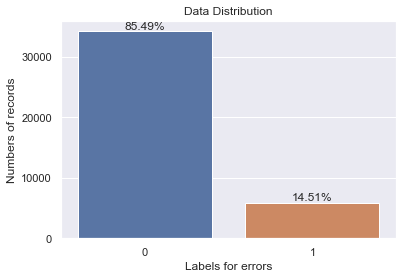

In [20]:
# Graphical representation of the target label percentage.
total_len = len(df['y'])
sns.set()
sns.countplot(df['y']).set_title('Data Distribution')
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            '{:.2f}%'.format(100*(height/total_len)),
            fontsize=12, ha='center', va='bottom')
sns.set(font_scale=1.5)
ax.set_xlabel("Labels for errors")
ax.set_ylabel("Numbers of records")
plt.show()

**This shows our data is highly imbalanced. Now I will run a model on the data and then also use a technique to work on the imbalance data so the data will be more balanced(smoting)**

# Logistic Regression Model building

Now I will run the logistic regression on the cleaned train data and the provided predicted data. lets define X and y

In [37]:
X=df_X
y=df_y
print(X.shape)
print(y.shape)

(40000, 64)
(40000, 1)


In [149]:
y.head()

,y
0,0
1,1
2,1
3,0
4,0


**Now lets separate the data into Test and Train set and apply the Model using scikit-learn.**

In [39]:
#now split the train data into 80-20
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.20, random_state=42)

In [40]:
#now lets make sure the split is doing the right thing
X_test1 = X_test.copy()
X_test1['y'] = y_test
print(X_train.shape)
print(X_test1.shape)
print(X_test1.y.value_counts())

(32000, 64)
(8000, 65)
0    6863
1    1137
Name: y, dtype: int64


Now I will create the logistic regression model

In [41]:
# Create LogisticRegression model
log_model = LogisticRegression()

# Fit our data
log_model.fit(X_train, y_train)

expected = y_test
prediction = log_model.predict(X_test)

# summarize the fit of the model
print(metrics.classification_report(expected, prediction))
print(metrics.confusion_matrix(expected, prediction))

print ("Accuracy  :: ", accuracy_score(expected, prediction))

acc_log = round(log_model.score(X_train, y_train) * 100, 4)
# Finding AUC Score for this model
log_model_probs=log_model.predict_proba(X_test)
print('AUC: ', roc_auc_score(y_test, log_model_probs[:,1]))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      6863
           1       0.56      0.07      0.12      1137

    accuracy                           0.86      8000
   macro avg       0.71      0.53      0.52      8000
weighted avg       0.82      0.86      0.81      8000

[[6805   58]
 [1063   74]]
Accuracy  ::  0.859875
AUC:  0.7521625336991818


Lets Plot this result in confusion matrix

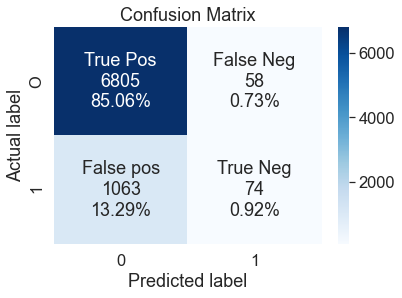

In [42]:
ax= plt.subplot()
cf_matrix = metrics.confusion_matrix(y_test,prediction)

group_names = ['True Pos','False Neg','False pos','True Neg']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['O', '1'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

**Based on the confusion matrix, the imbalaned result is high so lets see what feature are important and what can be reduce**


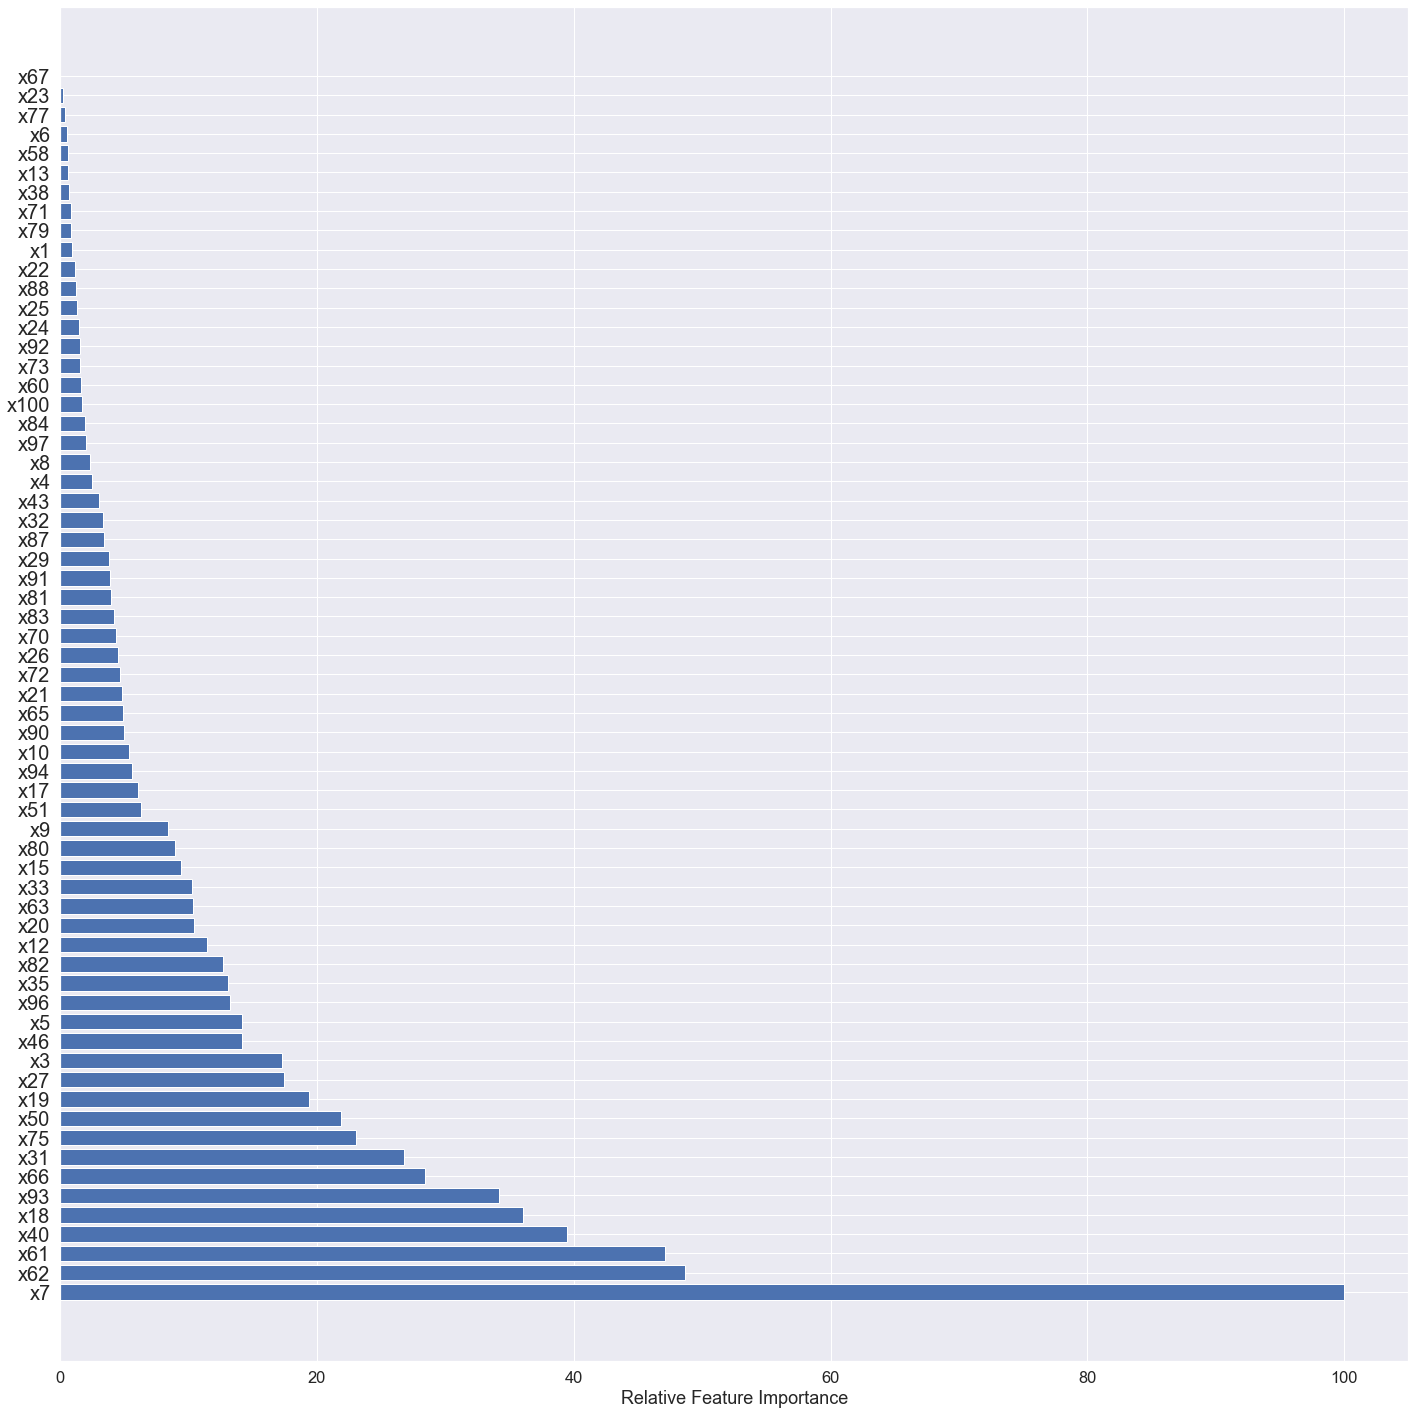

In [43]:
# this looks highly skewed as expected 
feature_importance = abs(log_model.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[::-1][:]
pos = np.arange(sorted_idx.shape[0]) + .5
featfig = plt.figure(figsize=(20,20))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=20)
featax.set_xlabel('Relative Feature Importance')
plt.tight_layout()   
plt.show()

In [44]:
feature_imp = pd.Series(abs(log_model.coef_[0]),index=X_train.columns).sort_values(ascending=False)
print(feature_imp)

x7      0.727947
x62     0.354481
x61     0.342950
x40     0.287549
x18     0.262288
x93     0.248726
x66     0.206608
x31     0.195000
x75     0.167958
x50     0.159300
x19     0.141384
x27     0.126721
x3      0.126028
x46     0.102968
x5      0.102868
x96     0.096580
x35     0.095467
x82     0.092378
x12     0.083032
x20     0.075646
x63     0.075099
x33     0.074759
x15     0.068725
x80     0.065123
x9      0.061165
x51     0.046060
x17     0.044117
x94     0.040881
x10     0.039175
x90     0.036211
x65     0.035562
x21     0.034862
x72     0.033876
x26     0.032560
x70     0.031631
x83     0.030428
x81     0.028941
x91     0.028175
x29     0.027489
x87     0.024740
x32     0.024424
x43     0.021969
x4      0.018173
x8      0.016786
x97     0.014484
x84     0.013940
x100    0.012559
x60     0.011918
x73     0.011484
x92     0.011133
x24     0.010700
x25     0.009664
x88     0.009196
x22     0.008668
x1      0.006870
x79     0.006138
x71     0.006078
x38     0.004830
x13     0.0046

**Based on the observation of feature importance, I will use only 10 main feature and create a new model.**

In [45]:
#lets make a feature importance with reduced set with more than 20%
importances = abs(log_model.coef_[0])
importances_top10= np.argsort(importances)[::-1][0:10]
important_feature_index = [i for i in importances_top10]
important_features_to_model = X_train.iloc[:, important_feature_index]
reducedSet = important_features_to_model.columns
print (reducedSet)

Index(['x7', 'x62', 'x61', 'x40', 'x18', 'x93', 'x66', 'x31', 'x75', 'x50'], dtype='object')


**Logistic regression model with reduced features**


In [46]:
X_train_r = X_train[reducedSet]
X_test_r = X_test[reducedSet]

In [47]:
X_train_r.shape

(32000, 10)

In [48]:
log_model2 = LogisticRegression()
# Fit our data
log_model2.fit(X_train_r, y_train)

expected = y_test
prediction_r = log_model2.predict(X_test_r)

# summarize the fit of the model
print(metrics.classification_report(expected, prediction_r))
print(metrics.confusion_matrix(expected, prediction_r))

print ("Accuracy  :: ", accuracy_score(expected, prediction_r))

acc_log = round(log_model2.score(X_train_r, y_train) * 100, 4)

# Finding AUC Score for this model
log_model2_probs=log_model2.predict_proba(X_test_r)
print(('AUC: ', roc_auc_score(y_test, log_model2_probs[:,1])))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      6863
           1       0.61      0.05      0.09      1137

    accuracy                           0.86      8000
   macro avg       0.74      0.52      0.51      8000
weighted avg       0.83      0.86      0.81      8000

[[6827   36]
 [1081   56]]
Accuracy  ::  0.860375
('AUC: ', 0.7432695507796706)


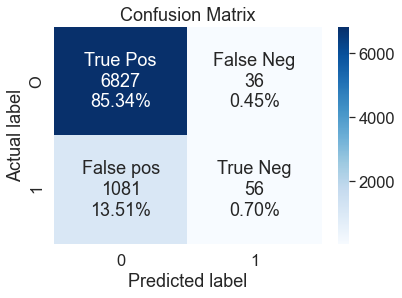

In [49]:
import matplotlib.pyplot as plt     

ax= plt.subplot()
cf_matrix = metrics.confusion_matrix(y_test,prediction_r)

group_names = ['True Pos','False Neg','False pos','True Neg']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['O', '1'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

# We know the data class is highly imbalanced. Now lets Use SMOTE to balance the class of predicted value 

In [50]:
X_test_r.shape

(8000, 10)

In [54]:
# Data balancing applied using SMOTE process
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from collections import Counter
print('Original dataset shape {}'.format(Counter(y_train)))
smt = SMOTE(sampling_strategy=0.8, random_state=200)
X_sm, y_sm = smt.fit_resample(X_train_r, y_train)
print('New dataset shape {}'.format(Counter(y_sm)))
X_sm = pd.DataFrame(X_sm, columns = list(X_train_r.columns))
X_sm = preprocessing.scale(X_sm)
X_sm = pd.DataFrame(X_sm, columns = list(X_train_r.columns))
print(y_sm.value_counts())
print(X_sm.shape)
print(y_sm.shape)

Original dataset shape Counter({'y': 1})
New dataset shape Counter({'y': 1})
y
0    27334
1    21867
dtype: int64
(49201, 10)
(49201, 1)


**I Will run the final Logistic Regression model useing the SMOTE balanced data

In [55]:
# Create LogisticRegression model
log_model_sm = LogisticRegression()

# Fit our data
log_model_sm.fit(X_sm, y_sm)

expected = y_test
prediction_sm = log_model_sm.predict(X_test_r)

# summarize the fit of the model
print(metrics.classification_report(expected, prediction_sm))
print(metrics.confusion_matrix(expected, prediction_sm))

print ("Accuracy  :: ", accuracy_score(expected, prediction_sm))

acc_log = round(log_model_sm.score(X_sm, y_sm) * 100, 2)

# Finding AUC Score for this model
log_model_sm_probs=log_model_sm.predict_proba(X_test_r)
print('AUC: ', roc_auc_score(y_test, log_model_sm_probs[:,1]))

              precision    recall  f1-score   support

           0       0.93      0.66      0.77      6863
           1       0.25      0.71      0.37      1137

    accuracy                           0.66      8000
   macro avg       0.59      0.68      0.57      8000
weighted avg       0.83      0.66      0.71      8000

[[4499 2364]
 [ 333  804]]
Accuracy  ::  0.662875
AUC:  0.7433067148723395


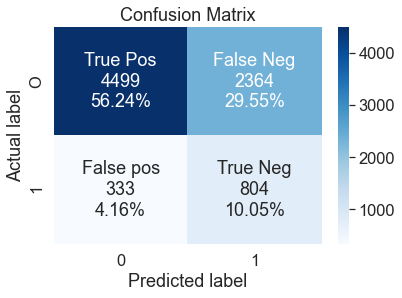

In [56]:
import matplotlib.pyplot as plt     

ax= plt.subplot()
cf_matrix = metrics.confusion_matrix(y_test,prediction_sm)

group_names = ['True Pos','False Neg','False pos','True Neg']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['O', '1'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

**This is the best model I can get for the Logistic Regrssion. So lets save this model with Pickle file**

In [57]:
import pickle
with open('log_model_sm_pickle', 'wb') as f:
    pickle.dump(log_model_sm, f)

# Now I will run non GLM model on the data as Random Forest Classifier

In [58]:
y_test.shape

(8000, 1)

In [59]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# start model with 100 decision trees
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
# Train the model on training data
rf.fit(X_train_r, y_train)

expected = y_test
prediction_rf = rf.predict(X_test_r)

# summarize the fit of the model
print(metrics.classification_report(expected, prediction_rf))
print(metrics.confusion_matrix(expected, prediction_rf))

print ("Accuracy  :: ", accuracy_score(expected, prediction_rf))

acc_random_forest = round(rf.score(X_train_r, y_train) * 100, 2)

# Finding AUC Score for this model
rf_probs=rf.predict_proba(X_test_r)
print('AUC: ', roc_auc_score(y_test, rf_probs[:,1]))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      6863
           1       0.50      0.05      0.09      1137

    accuracy                           0.86      8000
   macro avg       0.68      0.52      0.51      8000
weighted avg       0.81      0.86      0.80      8000

[[6807   56]
 [1082   55]]
Accuracy  ::  0.85775
AUC:  0.7190668198852502


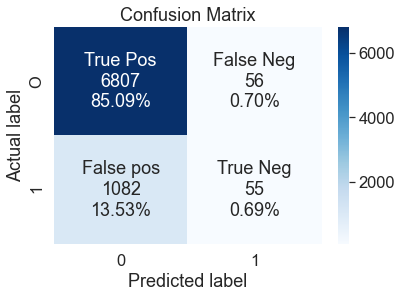

In [60]:
import matplotlib.pyplot as plt     

ax= plt.subplot()
cf_matrix = metrics.confusion_matrix(y_test,prediction_rf)

group_names = ['True Pos','False Neg','False pos','True Neg']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['O', '1'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

# Now run the Randon Forest Classifier in SMOTE data

In [61]:
X_train.shape

(32000, 64)

In [63]:
# Data balancing applied using SMOTE process
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from collections import Counter
print('Original dataset shape {}'.format(Counter(y_train)))
smt = SMOTE(sampling_strategy=0.6, random_state=200, k_neighbors=200)
X1_sm, y1_sm = smt.fit_resample(X_train_r, y_train)
print('New dataset shape {}'.format(Counter(y1_sm)))
X1_sm = pd.DataFrame(X1_sm, columns = list(X_train_r.columns))
X1_sm = preprocessing.scale(X1_sm)
X1_sm = pd.DataFrame(X1_sm, columns = list(X_train_r.columns))
print(y1_sm.value_counts())

Original dataset shape Counter({'y': 1})
New dataset shape Counter({'y': 1})
y
0    27334
1    16400
dtype: int64


In [64]:
X1_sm.shape

(43734, 10)

In [65]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# start model with 100 decision trees
rf_sm= RandomForestClassifier(n_estimators = 100, random_state = 42)
# Train the model on training data
rf_sm.fit(X1_sm, y1_sm)

expected = y_test
prediction_rf_sm = rf_sm.predict(X_test_r)

# summarize the fit of the model
print(metrics.classification_report(expected, prediction_rf_sm))
print(metrics.confusion_matrix(expected, prediction_rf_sm))

print ("Accuracy  :: ", accuracy_score(expected, prediction_rf_sm))

acc_random_forest = round(rf_sm.score(X1_sm, y1_sm) * 100, 2)

# Finding AUC Score for this model
rf_sm_probs=rf_sm.predict_proba(X_test_r)
print('AUC: ', roc_auc_score(y_test, rf_sm_probs[:,1]))

              precision    recall  f1-score   support

           0       0.89      0.68      0.77      6863
           1       0.20      0.47      0.28      1137

    accuracy                           0.65      8000
   macro avg       0.54      0.58      0.52      8000
weighted avg       0.79      0.65      0.70      8000

[[4660 2203]
 [ 601  536]]
Accuracy  ::  0.6495
AUC:  0.6205626874303735


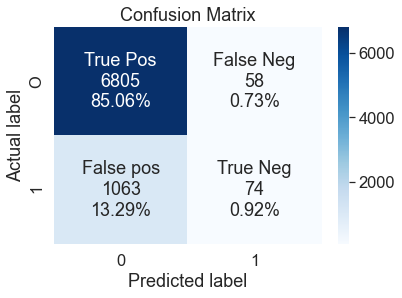

In [66]:
import matplotlib.pyplot as plt     

ax= plt.subplot()
cf_matrix = metrics.confusion_matrix(y_test,prediction)

group_names = ['True Pos','False Neg','False pos','True Neg']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['O', '1'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

**Based on these two tests, SMOTE does not improve anything on Random Forest Classifier. As Expected, RF Classifier has already handled the imbalance of data based on 100 initial trees used for this data. SO I will go with the RF model before SMOTE was applied**


In [67]:
import pickle
with open('rf_pickle', 'wb') as f:
    pickle.dump(rf, f)